In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from os.path import join, exists
from scipy.io import wavfile
import pickle
import json
from pprint import pprint


import sys

sys.path.append('../model/hillclimbing/')

from song_fitter import SongModel, get_scores

sns.set_palette('colorblind')

In [3]:
path = '../model/hillclimbing/res/170313_170200_test/'
if exists(join(path, 'aborted.txt')):
    raise ValueError('Aborted run')

In [4]:
sr, tutor = wavfile.read(join(path, 'tutor.wav'))
with open(join(path, 'params.json'), 'r') as f:
    run_param = json.load(f)

In [5]:
pprint(run_param)

{'commit': 'd40cfd66bcaf7f08eda979408b05e4026ad91062',
 'comp': 'linalg',
 'concurrent': 2,
 'days': 10,
 'iter_per_train': 20,
 'name': 'test',
 'replay': 5,
 'seed': 1489420920,
 'train_per_day': 10}


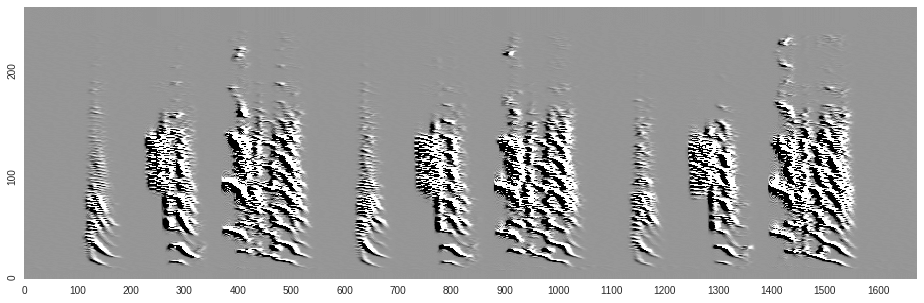

In [56]:
tspec = bsa.spectral_derivs(tutor, 256, 40, 1024)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
plt.show(fig)
plt.close(fig)

In [29]:
outputs = []
for i in range(run_param['concurrent']):
    outputs.append(wavfile.read(join(path, 'out_{}.wav'.format(i)))[1])

In [30]:
from IPython.display import Audio, display

In [31]:
display(Audio(tutor, rate=44100))

In [32]:
for output in outputs:
    display(Audio(output, rate=44100))

In [10]:
run = False  # Disabled because very long.
if run:
    for out in outputs:
        sim = bsa.similarity(out, tutor)
        bsa.similarity_plot(sim, out, tutor)
        print(sim['similarity'])

In [11]:
out = outputs[1]

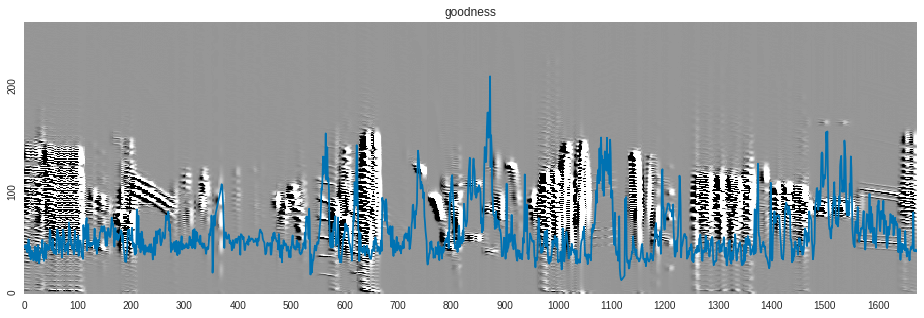

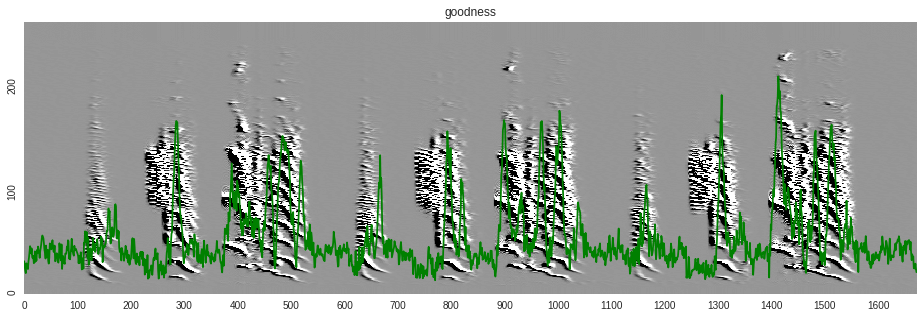

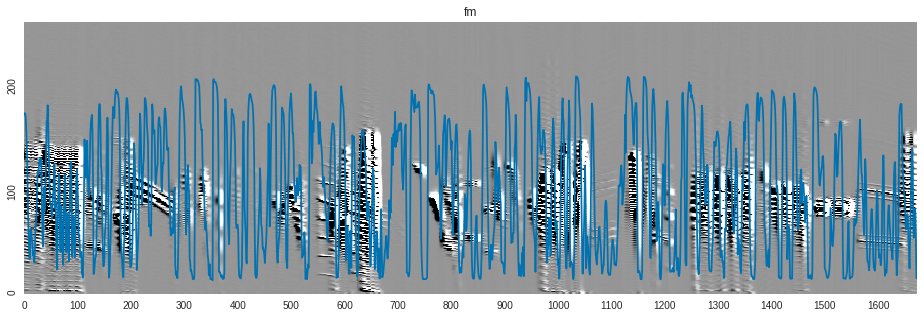

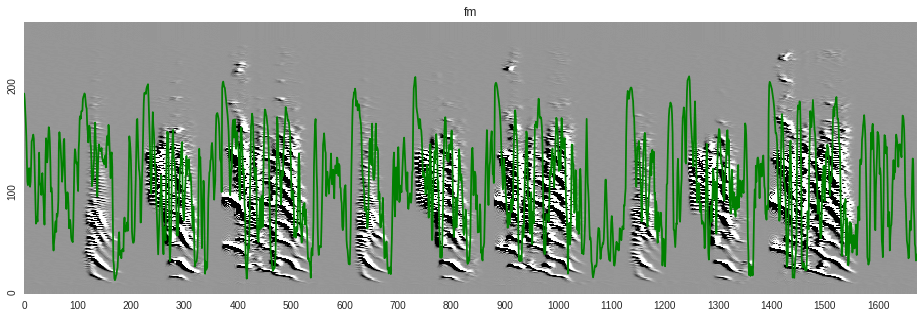

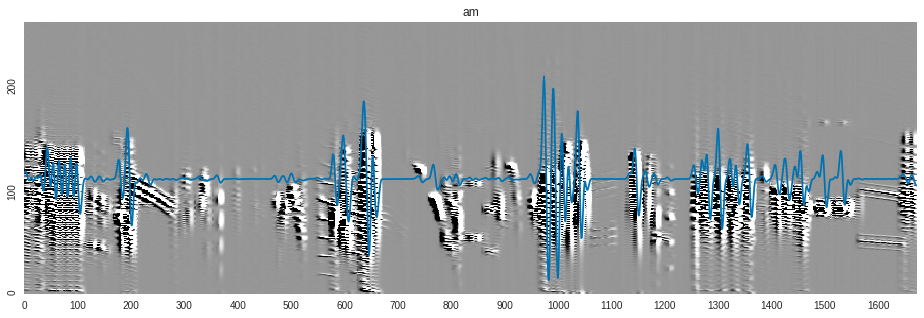

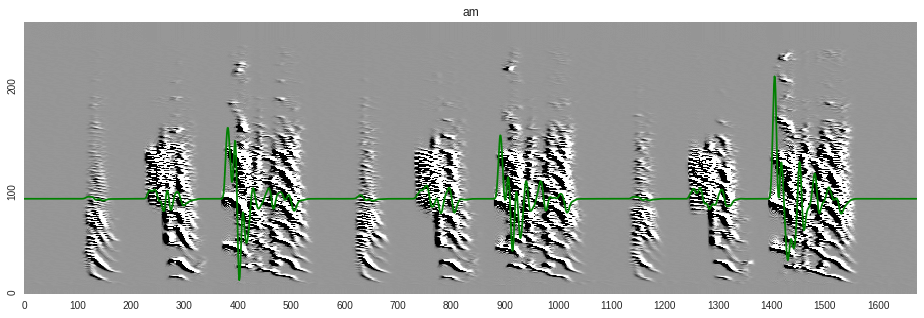

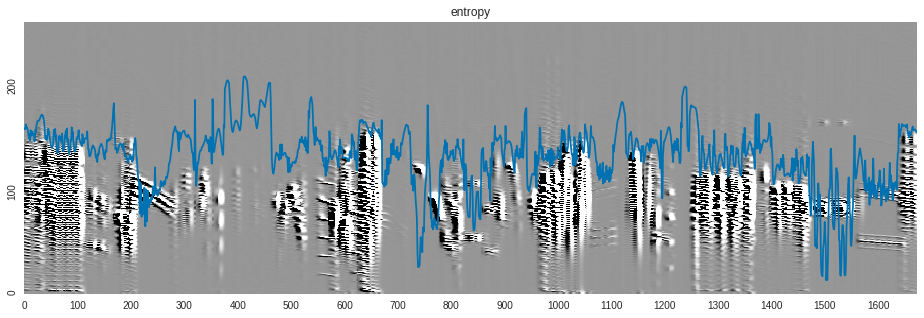

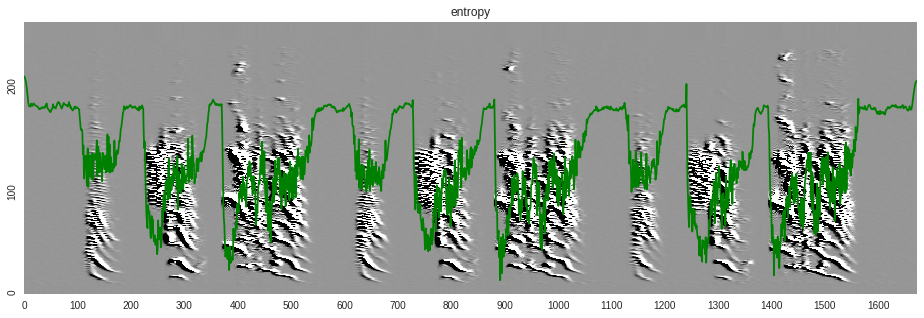

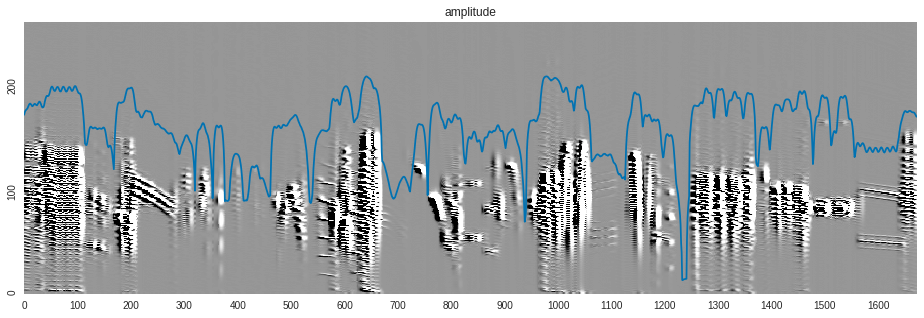

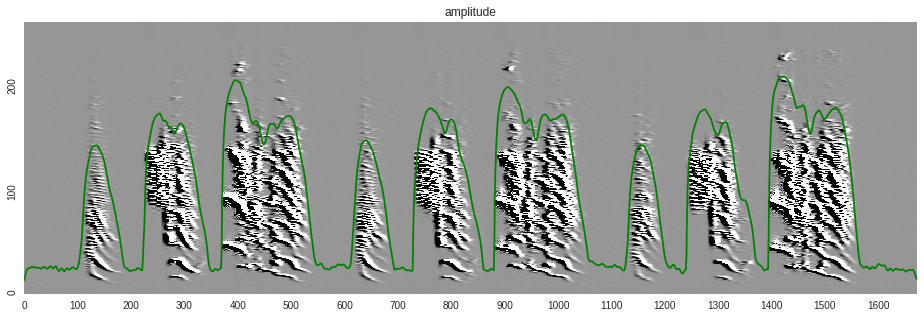

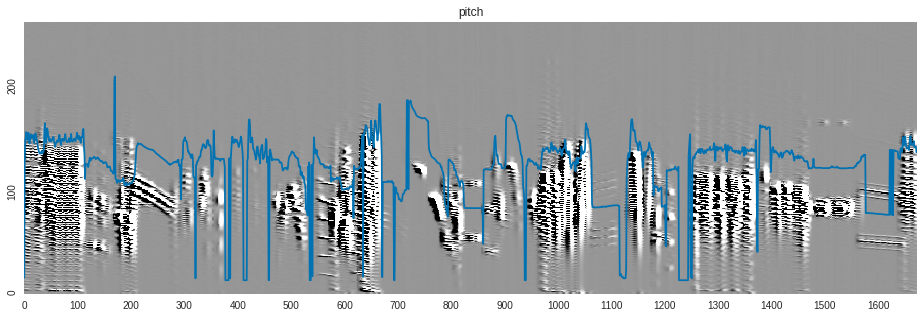

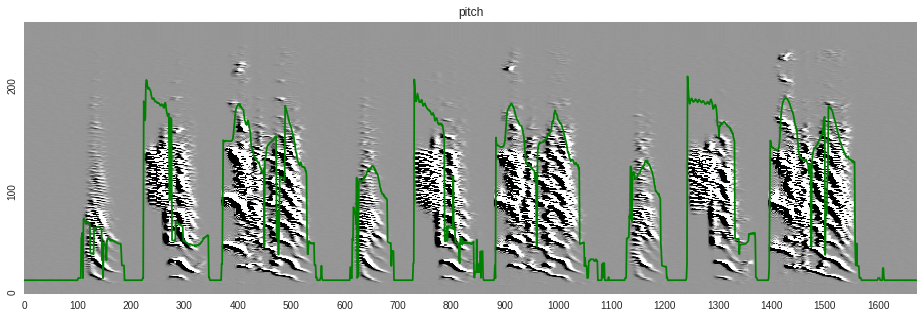

In [12]:
tfeat = bsa.all_song_features(tutor, 256, 40, 1024)
spec = bsa.spectral_derivs(out, 256, 40, 1024)
sfeat = bsa.all_song_features(out, 256, 40, 1024)
for name, value in sfeat.items():
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(spec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(value, ax)
    #ax.plot(tfeat[name])
    ax.set_title(name)
    fig = plt.figure(figsize=(16, 5))
    ax = fig.gca()
    ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
    bsa.plot_over_spec(tfeat[name], ax, color='g')
    #ax.plot(tfeat[name])
    ax.set_title(name)
    

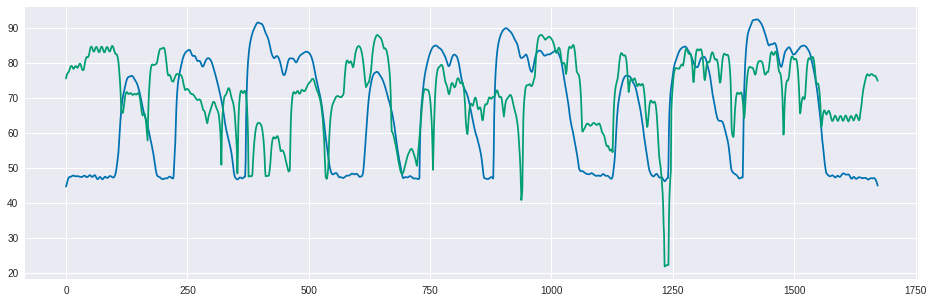

In [13]:
plt.figure(figsize=(16, 5))
plt.plot(tfeat['amplitude'])
plt.plot(sfeat['amplitude'])

In [14]:
with open(join(path, 'songs.pkl'), 'rb') as f:
    smodels = pickle.load(f)

In [15]:
len(smodels[1].gestures)

56

In [16]:
import synth

In [17]:
ab = []
for i, gesture in enumerate(smodels[0].gestures):
    p = gesture[1]
    start = gesture[0]
    try:
        end = smodels[0].gestures[i+1][0]
    except IndexError:
        end = len(tutor)
    size = end - start
    ab.append(synth.gen_alphabeta(p, size, falpha=lambda x, p: synth.only_sin(x, p, nb_sin=3),
                fbeta=lambda x, p: synth.only_sin(x, p, nb_sin=1),
                falpha_nb_args=13))
ab = np.concatenate(ab)

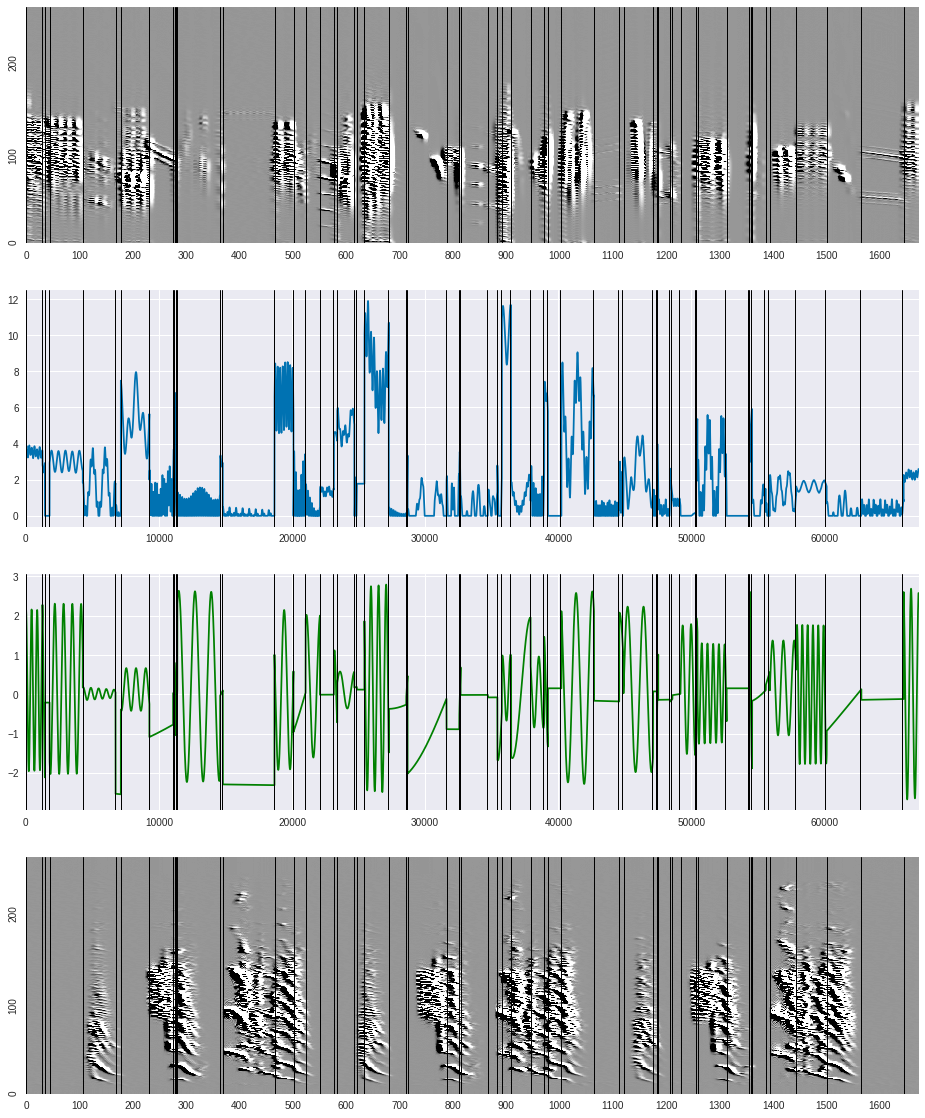

In [18]:
fig, axs = plt.subplots(4, 1, figsize=(16, 20))
ospec = bsa.spectral_derivs(outputs[0], 256, 40, 1024)
bsa.spectral_derivs_plot(ospec, contrast=0.01, ax=axs[0])
axs[0].set_xlim(0, ospec.shape[0])
axs[1].plot(ab[:, 0])
axs[1].set_xlim((0, ab.shape[0]))
axs[2].plot(ab[:, 1], color="g")
axs[2].set_xlim((0, ab.shape[0]))
bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=axs[3])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    axs[0].axvline(x=start/40, color="k", linewidth=1)
    axs[1].axvline(x=start, color="k", linewidth=1)
    axs[2].axvline(x=start, color="k", linewidth=1)
    axs[3].axvline(x=start/40, color="k", linewidth=1)

In [19]:
tutor_params = np.loadtxt('../data/ba_example_ab.dat')

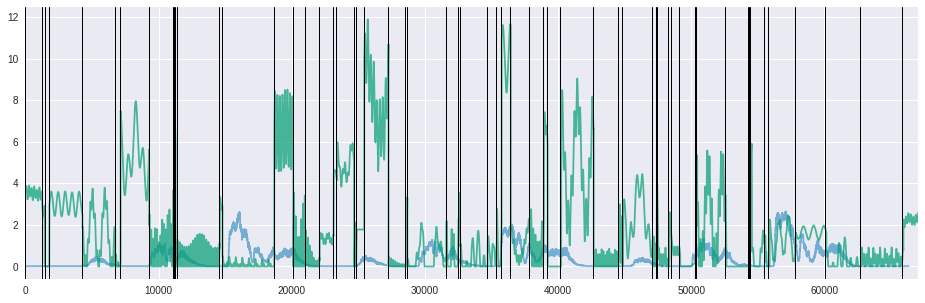

In [20]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0], alpha=0.5)
plt.plot(ab[:, 0], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

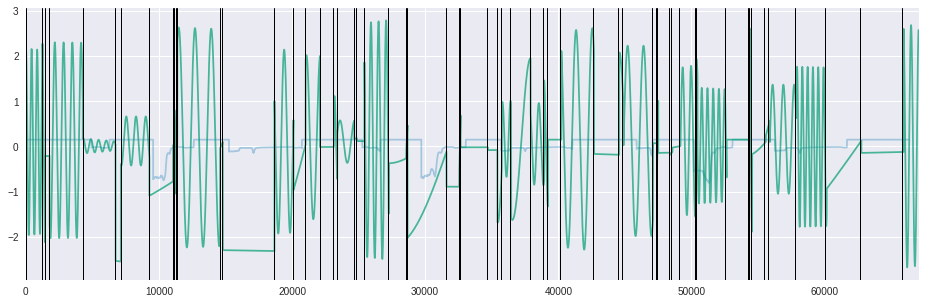

In [21]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 1], alpha=0.3)
plt.plot(ab[:, 1], alpha=0.7)
plt.xlim(0, ab.shape[0])
for i, gesture in enumerate(smodels[0].gestures):
    start = gesture[0]
    plt.axvline(x=start, color="k", linewidth=1)

In [22]:
gtes = np.loadtxt('../data/bells_gte.dat')
true_gtes = gtes[np.concatenate(((np.diff(gtes) > 100), (False,)))]

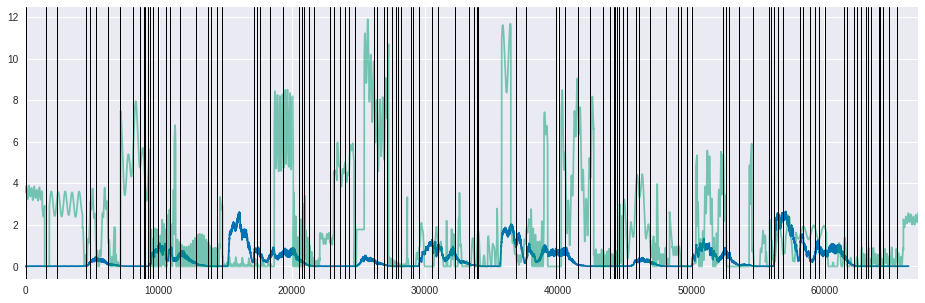

In [23]:
plt.figure(figsize=(16, 5))
plt.plot(tutor_params[:, 0])
plt.plot(ab[:, 0], alpha=0.5)
plt.xlim(0, ab.shape[0])
for gte in true_gtes:
    start = gesture[0]
    plt.axvline(x=gte, color="k", linewidth=1)

In [24]:
len(true_gtes)

110

In [25]:
np.mean(np.diff(true_gtes))

599.60550458715602

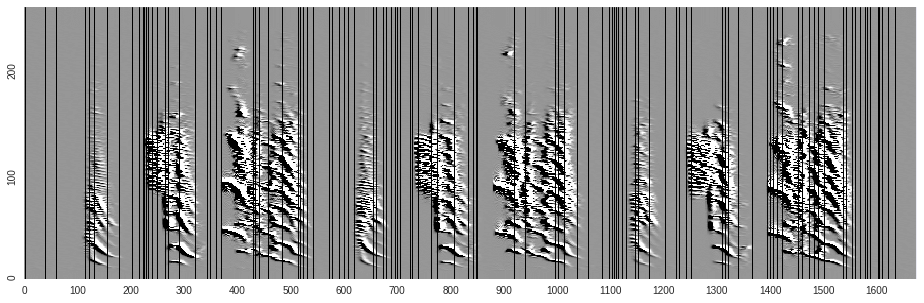

In [26]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(tspec, contrast=0.01, ax=ax)
ax.set_xlim(0, ab.shape[0]/40)
for gte in true_gtes:
    ax.axvline(x=gte/40, color="k", linewidth=1)

# Analysis of the song log

In [12]:
with open(join(path, 'data.pkl'), 'rb') as f:
    songlog = pickle.load(f)

In [13]:
import pandas

In [14]:
root_data = [item[1] for item in songlog if item[0] == ]

In [15]:
rd = pandas.DataFrame(root_data)

In [16]:
rd['songs'][0]

In [17]:
day_opt = pandas.DataFrame([elem[1] for elem in songlog if elem[0] == 'day_optim'])

In [18]:
day_opt.iloc[50*3:50*4]

Empty DataFrame
Columns: [ig, isong, new_score, pre_score, song]
Index: []

In [19]:
len(np.where(day_opt['pre_score'] - day_opt['new_score'] < 0)[0])/len(day_opt)

0.0

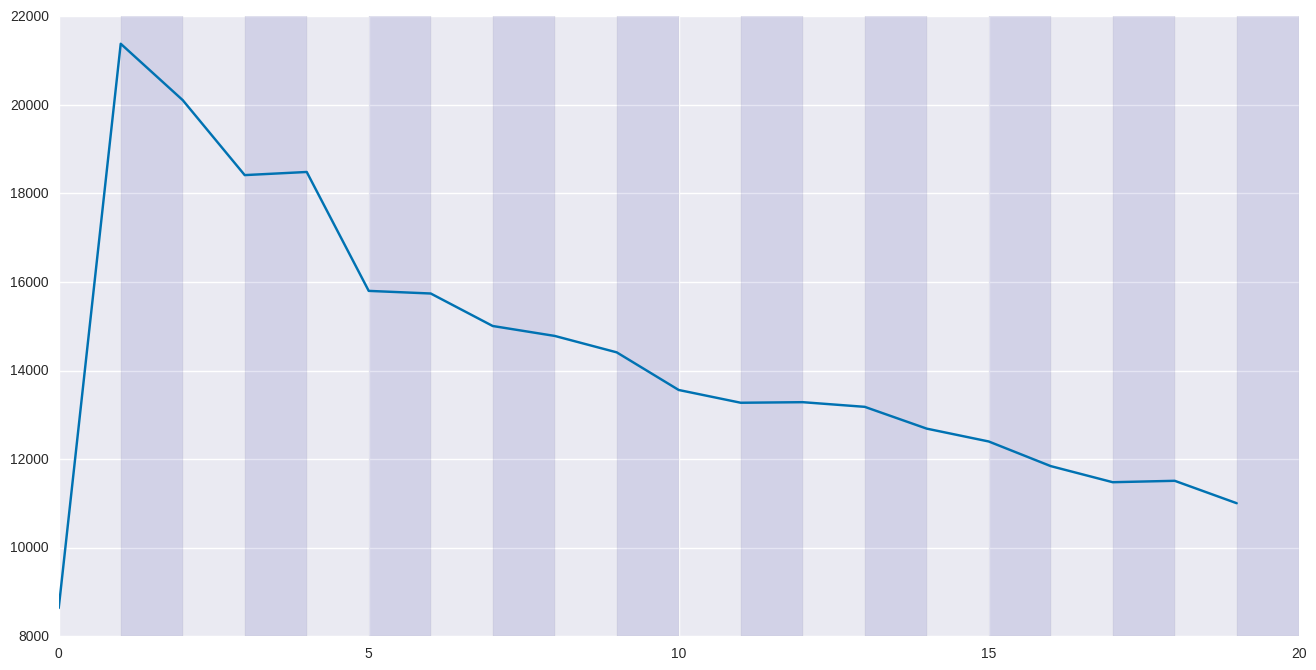

In [20]:
plt.figure(figsize=(16, 8))
for i in range(1, len(rd['scores']), 2):
    plt.axvspan(i, i+1, facecolor='darkblue', alpha=0.1)
plt.plot(rd['scores'].apply(np.min))
#plt.xticks(range(len(rd['scores'])), rd['moment'], rotation=75)
plt.show()

In [21]:
rd['songs'][0][0].gestures[23]

[51314, array([  0.00000000e+00,   0.00000000e+00,   3.14159265e+00,
          3.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          7.85398163e-01,   9.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   3.49065850e-01,   2.70000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.50000000e-01])]

In [22]:
rd['songs'][4][0].gestures[23]

[44621, array([  0.00000000e+00,   0.00000000e+00,   3.14159265e+00,
          3.00000000e+01,   0.00000000e+00,   0.00000000e+00,
          7.85398163e-01,   9.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   3.49065850e-01,   2.70000000e+02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.50000000e-01])]

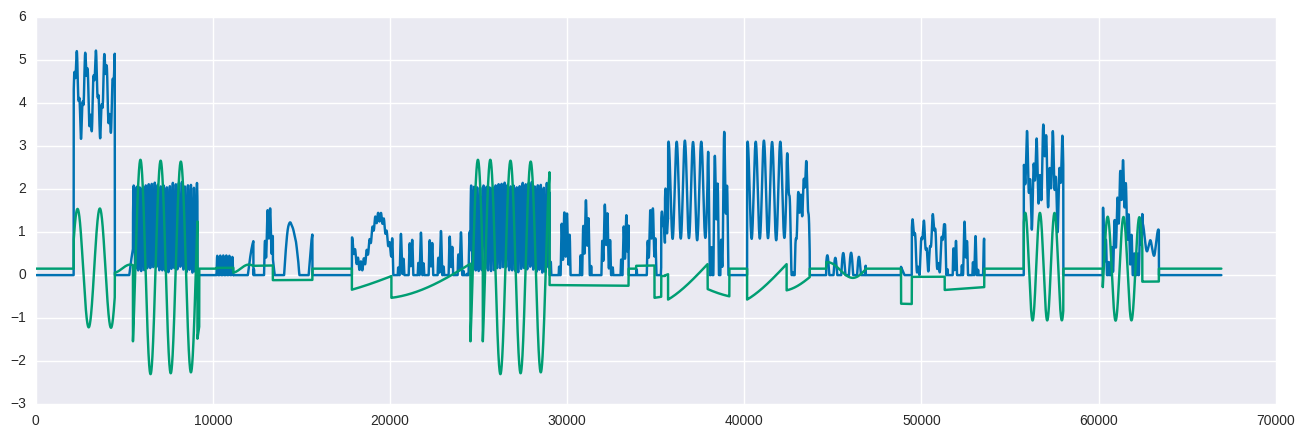

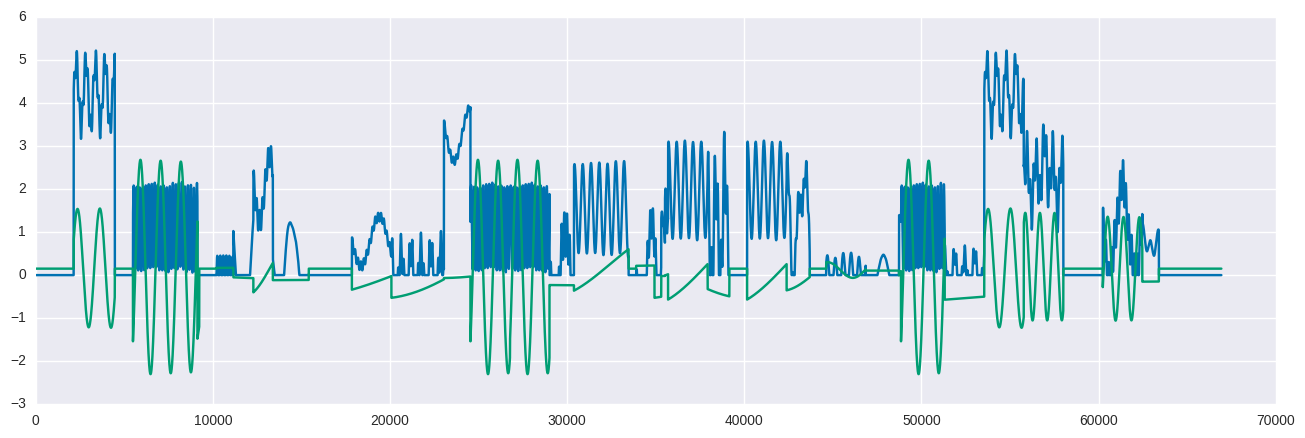

In [23]:
for i in range(len(rd['songs'].iloc[-1])):
    plt.figure(figsize=(16, 5))
    plt.plot(rd['songs'].iloc[-1][i].gen_alphabeta())

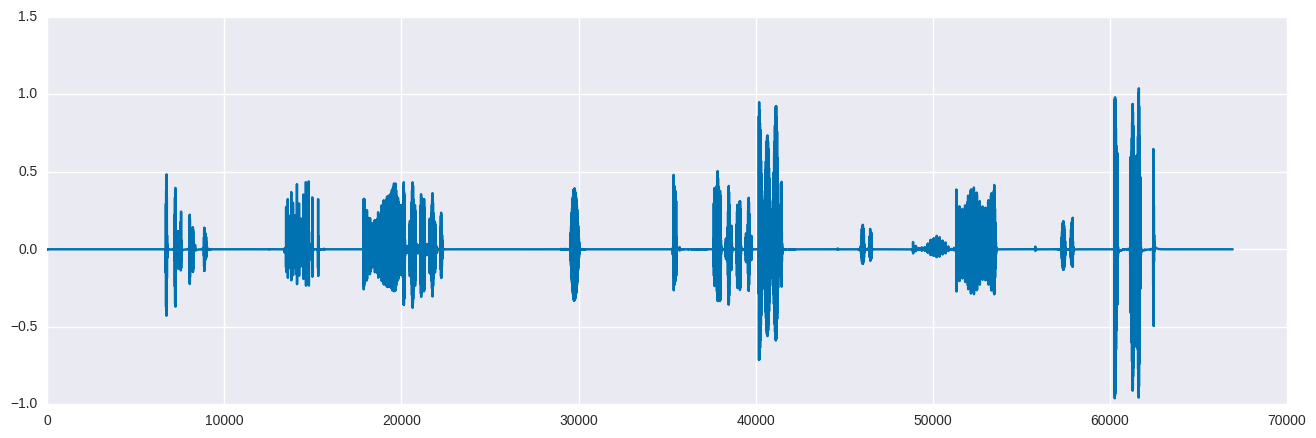

In [24]:
plt.figure(figsize=(16, 5))
plt.plot(rd['songs'][9][0].gen_sound())

In [33]:
print(any([rd.songs[2][0].parent == song for song in rd.songs[0]]))

False


In [37]:
rd.songs.iloc[-1]

In [38]:
from synth import synthesize
s = rd['songs'].iloc[-1][0].gen_alphabeta()
Audio(synthesize(s), rate=44100)